# GRIP : Sparks Foundation ( Data Science & Business Analytics Internship )

# By Rohan Vishwakarma

**Task 1 : Prediction using ML**

**This is a regression task (Simple linear Regression) which will predict the percentage of marks of a student based upon no. of hours they studied.**


# Importing libraries



In [46]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Reading Data from given URL

In [47]:
url = "http://bit.ly/w-data"
pre_data = pd.read_csv(url)
print("Data imported successfully")

pre_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [48]:
#To tally the number of rows and columns we'll use 
pre_data.shape

(25, 2)

In [49]:
#Given data information
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [50]:
pre_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the Data on 2D Graph

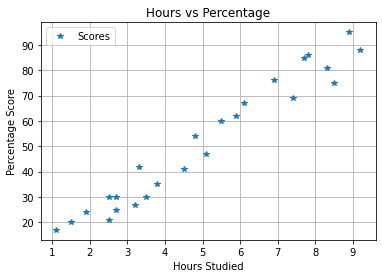

In [51]:
#Plotting the distribution of scores
pre_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.As both variables are directly proportional to each other.**

# Preparing the Data

**The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).**

In [62]:
X = pre_data.iloc[:, :-1].values  
y = pre_data.iloc[:, 1].values  

**Now that we have our attributes and labels, the next step is to split this data into training and test sets.**

In [63]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Linear Regression Model

In [64]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 


LinearRegression()

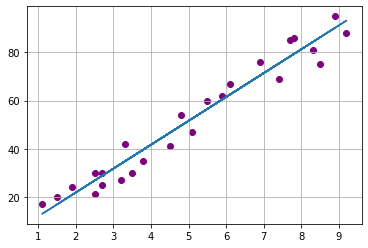

In [65]:
line= model.coef_*X+model.intercept_

plt.scatter(X, y, color='purple')
plt.plot(X, line);
plt.grid()
plt.show()


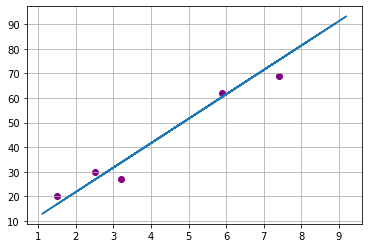

In [66]:
plt.scatter(X_test, y_test, color='purple')
plt.plot(X, line);
plt.grid()
plt.show()

# Testing Predictions 

 **Now that we have trained our algorithm, it's time to make some predictions.**

In [72]:
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [73]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [74]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [75]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})  
df

,Actual,Predicted
0,"[20, 27, 69, 30, 62]","[16.884144762398048, 33.73226077948985, 75.357..."


In [76]:
# Predicting the given data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format([[hours]]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


# Evaluating the model 

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [77]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
